In [1]:
import requests
import re 
import nltk
import matplotlib.pyplot as plt
import os

from nltk.corpus import stopwords
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Scraping review using beautifulsoup
product_reviews=[]
for i in range(1,30):
    product=[]
    url='https://www.amazon.in/Samsung-Galaxy-Watch-Active-SM-R820NZKAINU/product-reviews/B07ZD61BVX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    response= requests.get(url)
#     print(url)
    # creating soup object to iterate over the extracted content 
    soup= bs(response.content,'html.parser')
    
     # Extracting the content under specific tags 
#     reviews=soup.findAll('div',attrs={'class','qwjRop'})
    reviews= soup.findAll('span',attrs={'class','a-size-base review-text review-text-content'})
#     reviews=soup.findAll('div',attrs={'class','qwjRop'})
    for i in range(len(reviews)):
        product.append(reviews[i].text)
    product_reviews=product_reviews + product

with open('product_reviews.txt','w',encoding='utf8') as output:
    output.write(str(product_reviews))

    
    

In [3]:
product_reviews

["\n\n  I have been using smart watches for three year. All of them have been Fitbit. I got bored of them and was looking for a good SMWatch which is when I looked at Samsung Galaxy Active 2 LTE. Been 1 week since I started using it and I should say, this is an amazing piece of art both inside and out. The following are the highlights I noticed1. Beautiful round shaped ergonomically designed body dial with responsive bezel control.2. Cross checked the step count and hear rate with Fitbit. Step count is super accurate. Heart rate varies 1 to 2 bpm which is OK. Very much under tolerance level.3.  Beautiful leather strap. Easy to pin the strap to the leather, if you are coming from Fitbit Versa you know how important this is. Also it doesn't cause any itching. But pls make sure water doesn't stay on it for long time. You may lose it soon4. Auto detection of exercises are super accurate again. Walk and run is auto detected. Yet to check how it treats weights. Waiting for Gyms to reopen5. B

In [4]:
os.getcwd()
# os.chdir("stop.txt")  

# Joining all the reviews into single paragraph 
product_rev_string = " ".join(product_reviews) 

# Removing unwanted symbols incase if exists
product_rev_string = re.sub("[^A-Za-z" "]+"," ",product_rev_string).lower()
product_rev_string = re.sub("[0-9" "]+"," ",product_rev_string)   

#here we are splitting the words as individual string
product_reviews_words = product_rev_string.split(" ")

# removing the stop words
# stop_words = stopwords('en')

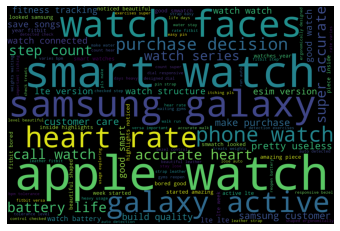

In [14]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()
    
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]
product_reviews_words = [w for w in product_reviews_words if not w in stopwords]
product_rev_string = " ".join(product_reviews_words)
    #creating word cloud for all words
wordcloud_product = WordCloud(background_color='black',width=3000,height=2000,max_words=100).generate(product_rev_string)
plt.axis('off')
plt.imshow(wordcloud_product)

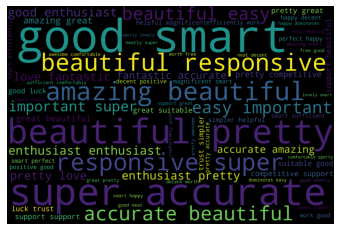

In [15]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[36:]

product_pos_in_pos = " ".join ([w for w in product_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(background_color='black',width=3000,height=2000).generate(product_pos_in_pos)
plt.axis('off')
plt.imshow(wordcloud_pos_in_pos)

#here we get wordcloud of all postive words in reviews

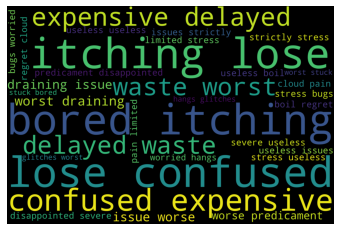

In [16]:
with open("negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    negwords = negwords[37:]

# negative word cloud
# Choosing the only words which are present in negwords
product_neg_in_neg = " ".join ([w for w in product_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(background_color='black',width=3000,height=2000).generate(product_neg_in_neg)
plt.axis('off')
plt.imshow(wordcloud_neg_in_neg)

#here we are getting the most repeated negative Wordcloud